In [1]:
import os
import sys
import random
import svgwrite
from svgwrite import cm, mm
from wand.image import Image
import cv2
from IPython import display
import ipywidgets as widgets

In [2]:
Notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
start_notes = [8, 3, 11, 6, 1, 8]
X_start = 2
Y_start = 2

In [3]:
def make_guitar(strings):
    Guitar = []
    for i in range(6):
        temp = []
        for j in range(12):
            bb = False
            if not strings[i]:
                bb = True
            dd = {'note': Notes[(start_notes[i] + j)%12], 'revealed': bb, 'pos_X': X_start+j, 'pos_Y': Y_start+i}
            temp.append(dd)
        Guitar.append(temp)
    return Guitar

In [19]:
def draw_guitar(Guitar, next_note, finished, strings, hide_revealed_notes=False, base_notes=False):
    dwg = svgwrite.Drawing(filename='Guitar.svg', viewBox=('0 30 600 290'), debug=True)
    hlines = dwg.add(dwg.g(id='hlines', stroke='black'))
    for y in range(6):
        hlines.add(dwg.line(start=(X_start*cm, (Y_start+y)*cm), end=((X_start+12)*cm, (Y_start+y)*cm)))

    vlines = dwg.add(dwg.g(id='vline', stroke='blue'))
    for x in range(13):
        vlines.add(dwg.line(start=((X_start+x)*cm, Y_start*cm), end=((X_start+x)*cm, (Y_start+5)*cm)))

    if base_notes:
        dwg.add(dwg.text("E", (1.5*cm, 2.15*cm)))
        dwg.add(dwg.text("B", (1.5*cm, 3.15*cm)))
        dwg.add(dwg.text("G", (1.5*cm, 4.15*cm)))
        dwg.add(dwg.text("D", (1.5*cm, 5.15*cm)))
        dwg.add(dwg.text("A", (1.5*cm, 6.15*cm)))
        dwg.add(dwg.text("E", (1.5*cm, 7.15*cm)))

    black_circles = dwg.add(dwg.g(id='b_circle', fill = 'black'))
    black_circles.add(dwg.circle(center=((X_start + 4.5)*cm, (Y_start + 2.5)*cm), r='0.12cm', stroke='black', stroke_width=2))
    black_circles.add(dwg.circle(center=((X_start + 6.5)*cm, (Y_start + 2.5)*cm), r='0.12cm', stroke='black', stroke_width=2))
    black_circles.add(dwg.circle(center=((X_start + 8.5)*cm, (Y_start + 2.5)*cm), r='0.12cm', stroke='black', stroke_width=2))
    black_circles.add(dwg.circle(center=((X_start + 11.5)*cm, (Y_start + 1.5)*cm), r='0.12cm', stroke='black', stroke_width=2))
    black_circles.add(dwg.circle(center=((X_start + 11.5)*cm, (Y_start + 3.5)*cm), r='0.12cm', stroke='black', stroke_width=2))
    
    
    shapes = dwg.add(dwg.g(id='shapes', fill='white'))

    for ind, i in enumerate(Guitar):
        for j in i:
            if j['revealed'] and strings[ind]:
                circle = dwg.circle(center=((j['pos_X'] + 0.5)*cm, (j['pos_Y'])*cm), r='0.30cm', stroke='black', stroke_width=2)
                shapes.add(circle)
                if not hide_revealed_notes:
                    if len(j['note'])==1:
                        dwg.add(dwg.text(j['note'], ((j['pos_X'] + 0.35)*cm, (j['pos_Y']+0.13)*cm)))
                    else:
                        dwg.add(dwg.text(j['note'], ((j['pos_X'] + 0.28)*cm, (j['pos_Y']+0.13)*cm)))

    if not finished:
        red_circle = dwg.add(dwg.g(id='shapes2', fill = 'red'))
        red_circle.add(dwg.circle(center=((next_note['pos_X'] + 0.5)*cm, (next_note['pos_Y'])*cm), r='0.30cm', stroke='black', stroke_width=2))

    else:
        dwg.add(dwg.text("Well done buddy", ((X_start + 4.5)*cm, (Y_start+6)*cm)))

    dwg.save()

In [20]:
def convert_to_png():
    with Image(filename="Guitar.svg") as img:
        img.format = "png"
        img.save(filename="Guitar.png")
    os.remove("Guitar.svg")

In [21]:
def preprocess():
    image = cv2.imread("Guitar.png")
    y=30
    x=30
    h=220
    w=520
    crop = image[y:y+h, x:x+w]
    half = cv2.resize(crop, (800, 250))
    cv2.imwrite("Guitar.png", half) 

In [22]:
def find_next_note(Guitar):
    not_revealed = []
    for i in range(len(Guitar)):
        for j in range(len(Guitar[i])):
            if not Guitar[i][j]['revealed']:
                not_revealed.append([i, j, Guitar[i][j]])

    if len(not_revealed)==0:
        return 0 ,0 ,"_", True
        
    next_note = random.choice(not_revealed)

    return next_note[0], next_note[1], next_note[2], False

In [23]:
def display_img():
    display.display(display.Image(filename="Guitar.png"))

In [24]:
def process_inp(ans):
    new_ans = ""
    for i in ans:
        if i>='a' and i<='z':
            new_ans = new_ans + chr(ord('A') + ord(i) - ord('a'))
        elif i=='3':
            new_ans = new_ans + "#"
        else:
            new_ans = new_ans + i
    return new_ans

In [25]:
def run(strings, hide_revealed_notes=True):
    Guitar = make_guitar(strings)
    finished = False
    prev_i = -1
    prev_j = -1
    while not finished:
        i, j, next_note, finished = find_next_note(Guitar)
        draw_guitar(Guitar,next_note, finished,strings, hide_revealed_notes)
        convert_to_png()
        preprocess()
        Text_Lab = ["You'll never get this one","Hmm..","You're dumb","You'll never do anything great or even good enough",
                    "You're parents still wishes they used a condom", "You're therapist wishes to die", "No one loves you"]
        rnd_lab = random.choice(Text_Lab)
        display.clear_output()
        display_img()
        if finished:
            print("You might be worth a tiny bit")
            break
        ans = input(rnd_lab)
        ans = process_inp(ans)
        first_time = True
        while ans!=next_note['note'] and ans!='.':
            first_time = False
            rnd_lab = random.choice(Text_Lab)
            display.clear_output()
            display_img()
            display.display(display.Markdown('<span style="color: #ff0000">WRONGGGG!!</span>'))
            ans = input(rnd_lab)
            ans = process_inp(ans)
        Guitar[i][j]['revealed'] = True
        if prev_i!=-1:
            Guitar[prev_i][prev_j]['revealed'] = False
            prev_i = -1
            prev_j = -1
        if ans=='.':
            prev_i = i
            prev_j = j

In [26]:
def  show_all_notes():
    strings = [True]*6
    Guitar = make_guitar(strings)
    for i in range(6):
        for j in range(12):
            Guitar[i][j]['revealed'] = True

    draw_guitar(Guitar, None, True, strings, False)
    convert_to_png()
    preprocess()
    display_img()
    

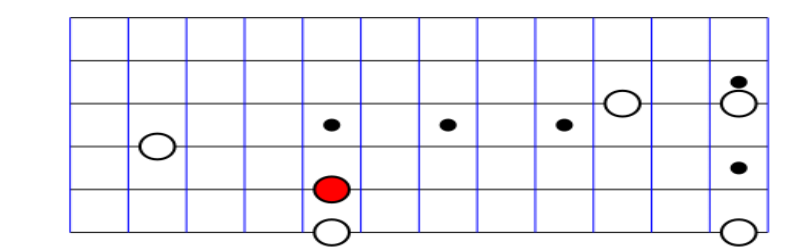

In [ ]:
if __name__ == '__main__':
    # strings = Which strings you want to memorize, [E,B,G,D,A,E]
    # show_revealed_notes = hides the notes you already answered, else just shows empty circle
    if False:
        show_all_notes()
    else:
        strings = [False, False, True, True, True, True]
        hide_revealed_notes = True
        run(strings, hide_revealed_notes)